In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Importing the df
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans


In [22]:
dict={}
dict["X3"]= "What is your Age?"
dict["X4"]= "What is your Gender?"
dict["X5"]= "What is your country’s official language?"
dict["X6"]= "What is your highest level of education"
dict["X7"]= "What is your marital status?"
dict["X8"]= "What is your employment status?"
dict["X9"]= "What is your religion?"
dict["X10"]= "Have you contracted the Covid-19 virus?"
dict["X11"]= "Are you aware of the Covid-19 vaccine?"
dict["X12"]= "How did you know about Covid-19 vaccine?"
dict["X13"]= "What is your Nationality?"
dict["Y"]= "Have you been vaccinated?"
dict["X14"]= ""
dict["X15"]= ""
dict["X16"]= "Are you willing to encourage people to take the Covid-19 vaccin"
dict["X17"]= "I don’t think the Covid-19 vaccine is effective."
dict["X18"]= "I think it may cause infertility"
dict["X19"]= "I don’t trust the country that manufactures the Covid-19 vaccine."
dict["X20"]= "I think the Covid-19 vaccine is safe.\n"
dict["X21"]= "I am worried about the side effect of the vaccine'"
dict["X22"]= "Covid-19 vaccine will protect me from contacting corona virus"
dict["X23"]= "I think the Covid-19 vaccine affects human immune system\n'"
dict["X24"]= "The vaccine is not free'"
dict["X25"]= "The location where am to   take the vaccine is far."
dict["X26"]= "The rumors I hear about the effect of  Covid-19 vaccine"
dict["X27"]= "It is against my belief."
dict["X28"]= "The Covid-19 vaccine helps to boost  immune system"
dict["X29"]= "I fear taking injection(needles).\n"
dict["X30"]= "I believe my immune system can fight against corona virus"
dict["X31"]= "None of the above"
dict["X32"]= "Covid-19   vaccine damages human DNA\n"
dict["X33"]= "Health care workers use COVID-19 Vaccine to make money"
dict["X34"]= "I believe that Covid-19 vaccine was developed to reduce African population"
dict["X35"]= "I believe religious power can also cure the corona virus not the vaccine alone"
dict["X36"]= "Covid-19 vaccine can reduce the chance of infection."
dict["X37"]= "Covid-19 vaccine causes a person to get Covid-19"
dict["X38"]= "I believe people can also be healed from Covid-19 by taking traditional medicine"
dict["X39"]= "I believe that through prayers people can be healed from corona virus."

In [23]:
df=pd.read_excel("Covid_perception_cleaned.xlsx")
df=pd.DataFrame(df)
for col in df.columns:
    df[col]=df[col].fillna(value="None")
    df[col]=df[col].str.strip()
    df[col]=df[col].str.lower()
    df[col]=df[col].astype("category")

In [24]:
# Handle ordinal categorical columns

replace_map1={"strongly disagree":1, "disagree":2,"neutral":3,"agree":4,"strongly agree":5}
replace_degre={"secondary":1,"bachelor(undergraduates)":2,"masters":3,"phd":4}
replace_age = {"18-25 year":1, "26-33years":2,"34-41years":3,"42-49year":4,"50-59years":5}
replace_target={"no":1, "maybe":2, "yes":3}
df= df.replace(replace_map1)
df= df.replace(replace_degre)
df= df.replace(replace_age)
# df["Y"]=df["Y"].replace(replace_target)

In [25]:
# replace_target={"no":1, "maybe":2, "yes":3}
df["Y"]=df["Y"].cat.as_ordered()

In [26]:
lb_make = LabelEncoder()

for col in ['X4', 'X13', 'X5', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'Y', 'X16', 'X17',"Y"]:
     df[col]=lb_make.fit_transform(df[col])
      


In [27]:
from scipy import stats
for col in df.columns:
 if col !="Y":
   print(f'Correlation between {col} and "Y"|    {stats.pearsonr(df[col], df["Y"])} \n')

Correlation between X3 and "Y"|    (0.12236762879529298, 0.0883446151980548) 

Correlation between X4 and "Y"|    (0.1837116032960951, 0.010145876708576173) 

Correlation between X13 and "Y"|    (-0.12098779240598533, 0.09202036947398337) 

Correlation between X5 and "Y"|    (0.2046297299995012, 0.004110498345731295) 

Correlation between X6 and "Y"|    (0.24720218982658804, 0.0004939283487729741) 

Correlation between X7 and "Y"|    (0.12583159292982118, 0.07963305821699924) 

Correlation between X8 and "Y"|    (0.010916657381052505, 0.8796071477507852) 

Correlation between X9 and "Y"|    (-0.04531009276614963, 0.5293646111129123) 

Correlation between X10 and "Y"|    (-0.02777483200280707, 0.6999150157879874) 

Correlation between X11 and "Y"|    (0.17891056653234128, 0.012331535661213545) 

Correlation between X12 and "Y"|    (-0.07090433002007124, 0.32462423139346497) 

Correlation between X16 and "Y"|    (0.2779132186098715, 8.365858464126497e-05) 

Correlation between X17 and "Y

<AxesSubplot:>

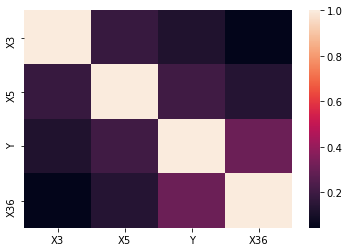

In [28]:
cormat = df[["X3","X5","Y","X36"]].corr()
sns.heatmap(cormat)

In [29]:
cormat.nlargest(columns="Y",n=1)

,X3,X5,Y,X36
Y,0.122368,0.20463,1.0,0.307608


In [30]:
cormat.head()

,X3,X5,Y,X36
X3,1.000000,0.183179,0.122368,0.043313
X5,0.183179,1.000000,0.204630,0.139649
Y,0.122368,0.204630,1.000000,0.307608
X36,0.043313,0.139649,0.307608,1.000000


In [31]:
writer = pd.ExcelWriter('analysis_file.xlsx')
df.to_excel(writer,'final_data')
description = df.describe()
description.to_excel(writer,'description data')

correlation = df.corr(method='pearson')
correlation.to_excel(writer,'correlation')
writer.save()

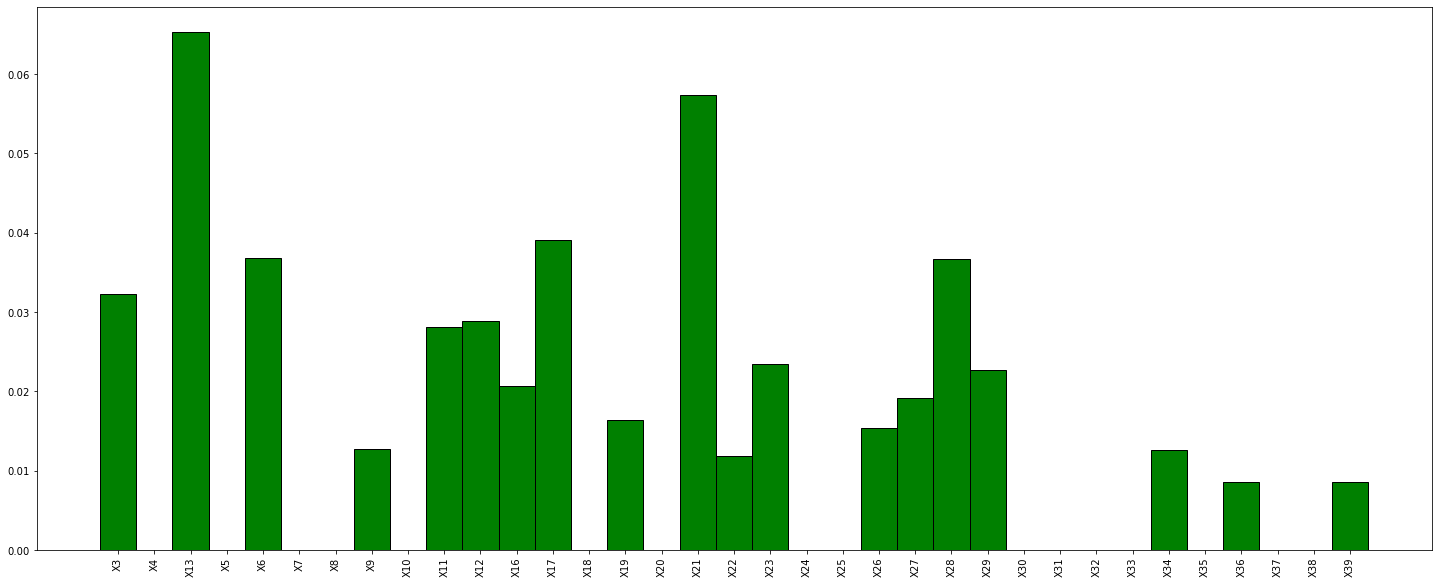

0.49646614069691


D:\Anaconda\lib\site-packages\xlsxwriter\workbook.py:329: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


<Figure size 432x288 with 0 Axes>

In [32]:

from sklearn.tree import DecisionTreeClassifier
X=df.iloc[:,:-1]  
y= df.iloc[:,[-1]]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# importance = clf.coef_[0]
importance = clf.tree_.compute_feature_importances(normalize=False)
dicts={}
for i,v in enumerate(importance):
    dicts[f"X{i}"]=v
# plot feature importance
fig,ax=plt.subplots(figsize=(25,10))

p1=ax.bar([x for x in X.columns], importance,width=1.0, facecolor='green', edgecolor='black')
#plt.grid()
plt.xticks(rotation=90)
# plt.legend([x for x in df.columns])
#ax.bar_label(p1, fmt='%.2f',label_type='center')
plt.show()
plt.savefig("../figc/fig_feature_importance.png",bbox_inches='tight',dpi=400)
f_i = pd.DataFrame(dicts,index=[1])
f_i.to_excel(writer,'feature_importance')
writer.save()


f=0
for g in importance:
    f=f+g
print(f)


<AxesSubplot:ylabel='Frequency'>

<Figure size 1800x720 with 0 Axes>

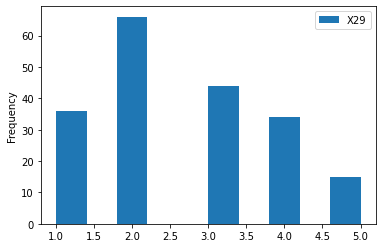

In [34]:
plt.figure(figsize=(25,10))
df[["X29"]].plot.hist(stacked=True)

<AxesSubplot:xlabel='X3', ylabel='Y'>

<Figure size 2160x720 with 0 Axes>

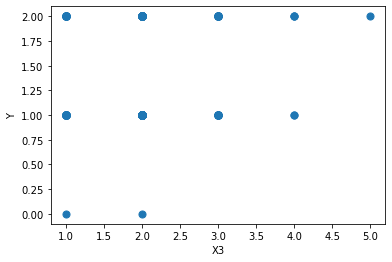

In [35]:
plt.figure(figsize=(30,10))
df.plot.scatter(x="X3", y="Y", cmap="viridis", s=50)

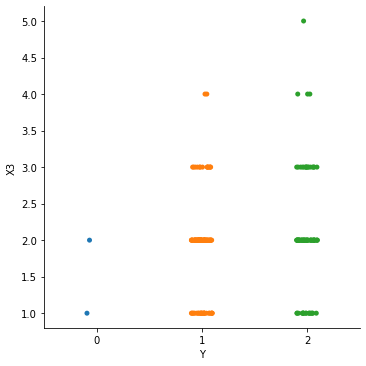

In [41]:
sns.catplot(x="Y", y="X3", data=df,jitter=True, legend=True,margin_titles=True)

<AxesSubplot:xlabel='X4', ylabel='count'>

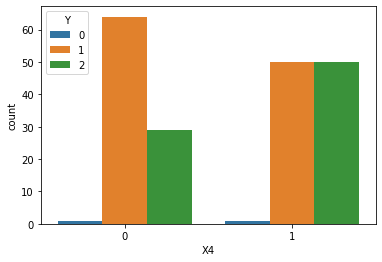

In [42]:
hue_order=["yes", "no","maybe"]
sns.countplot(x="X4", hue="Y", data=df)


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


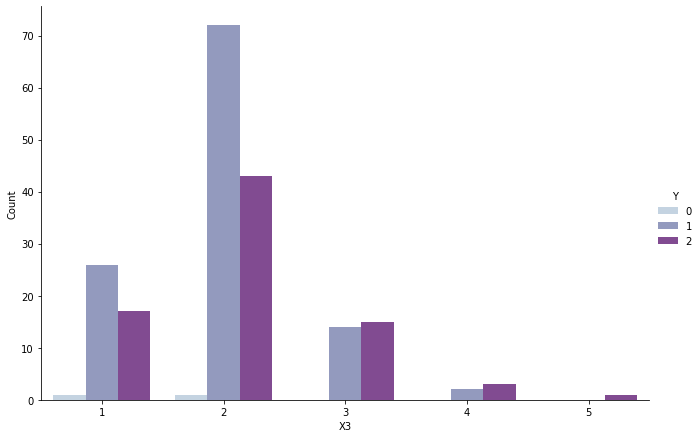

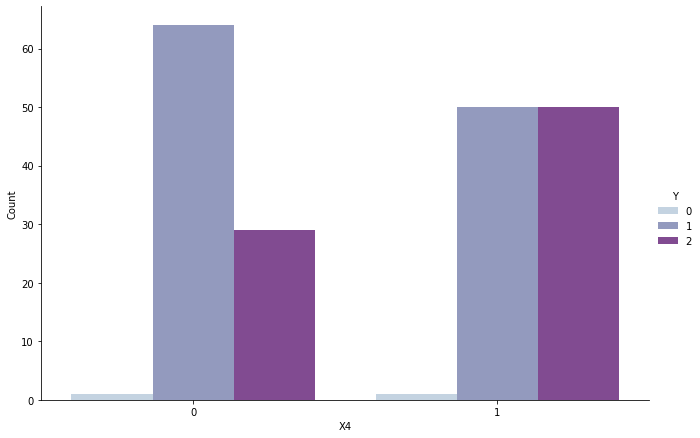

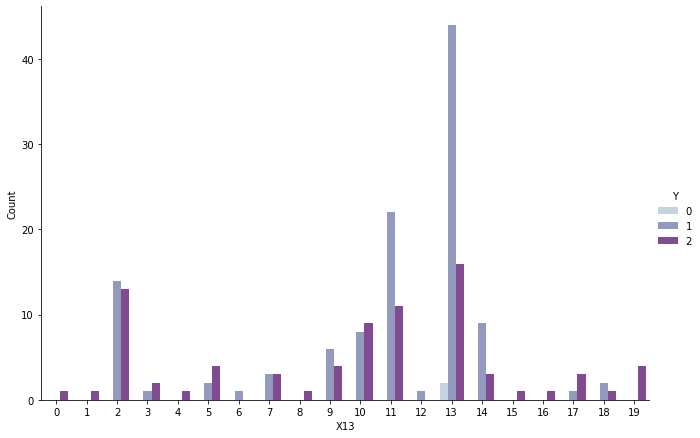

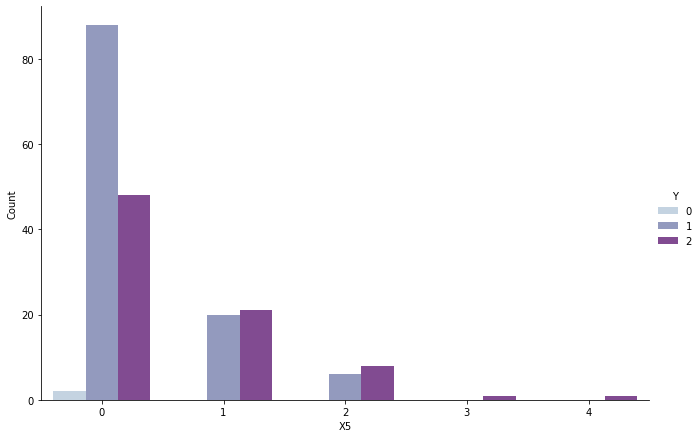

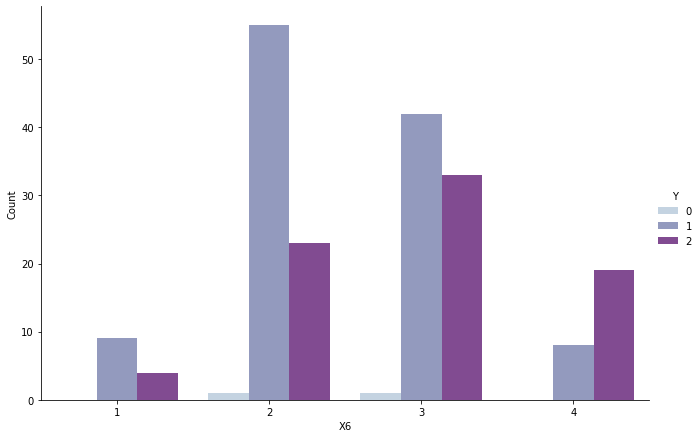

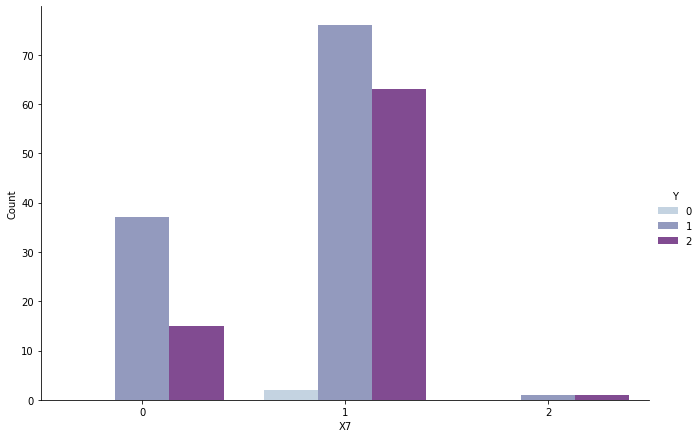

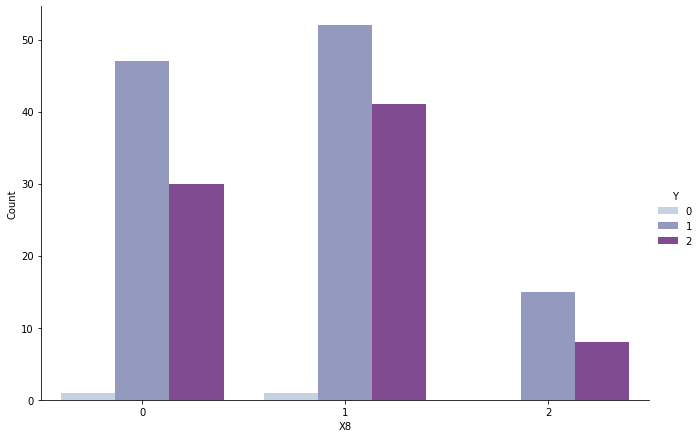

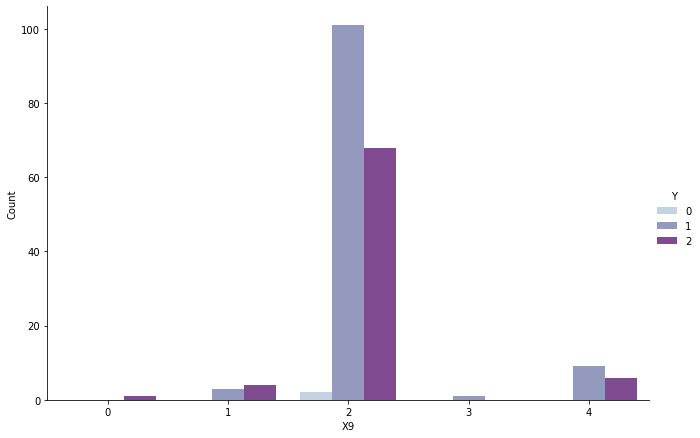

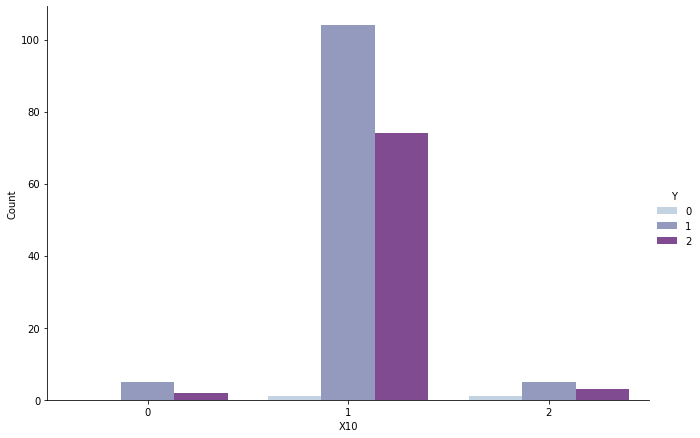

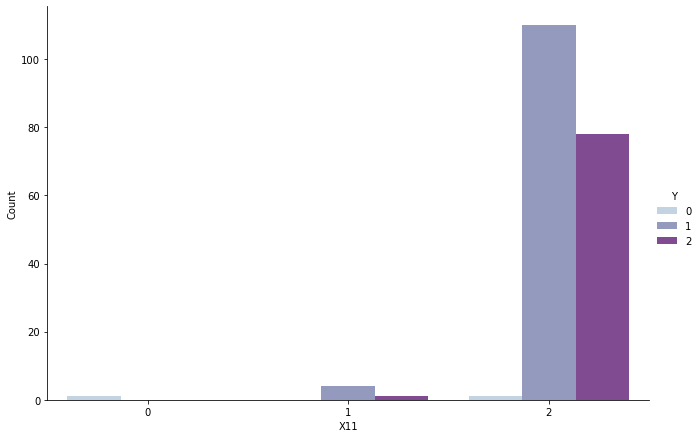

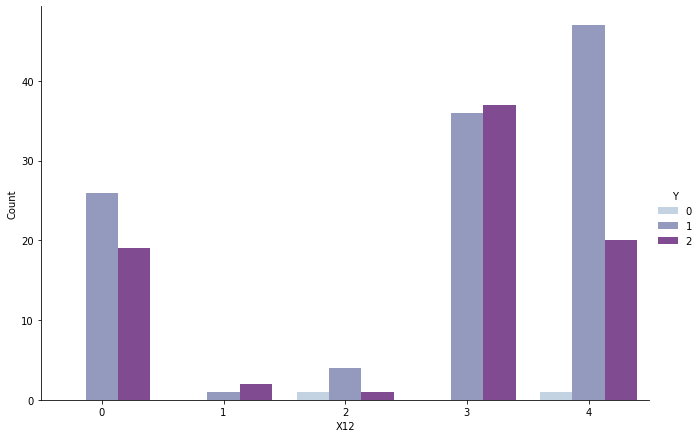

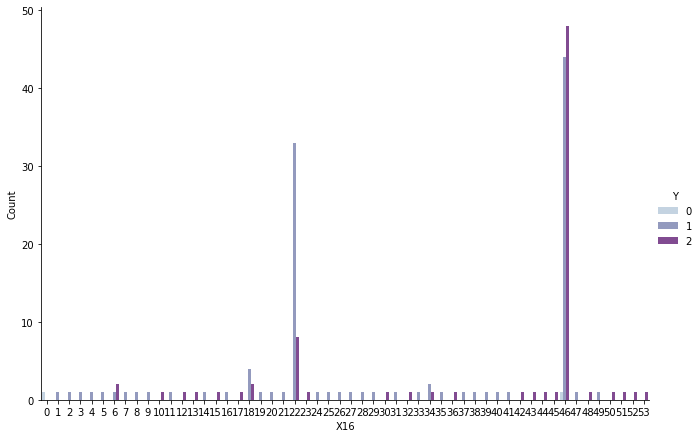

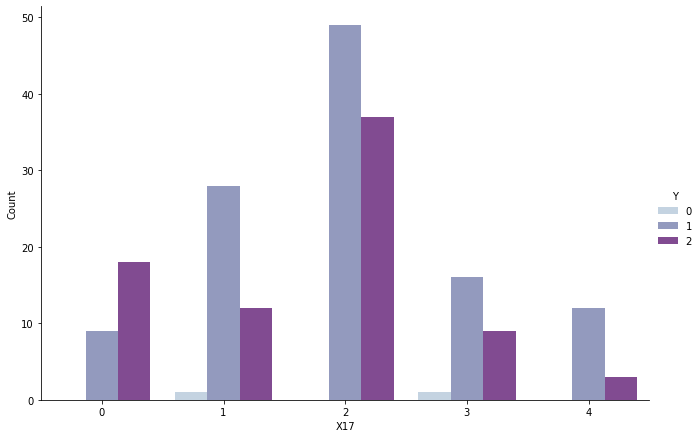

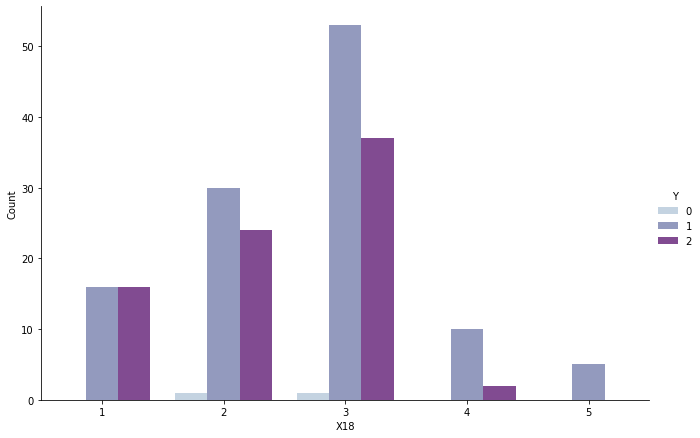

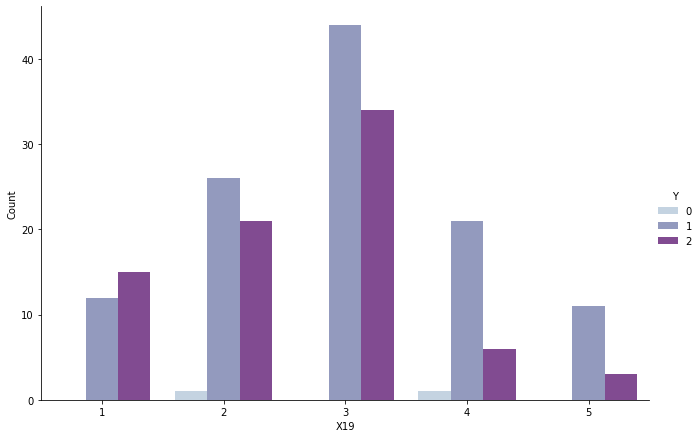

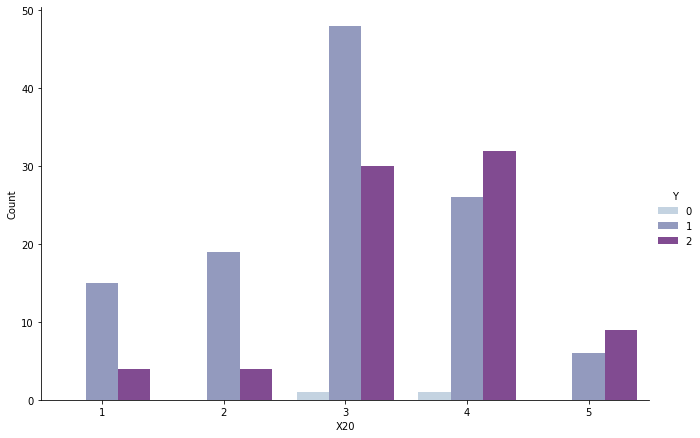

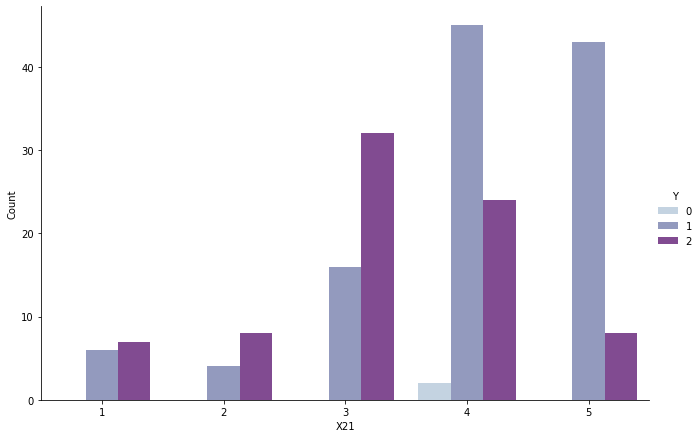

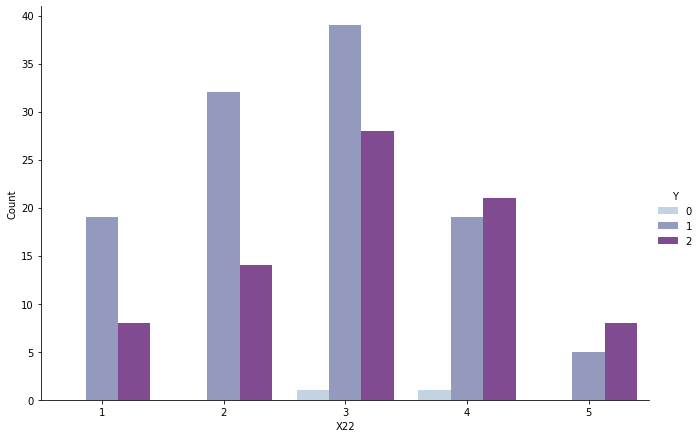

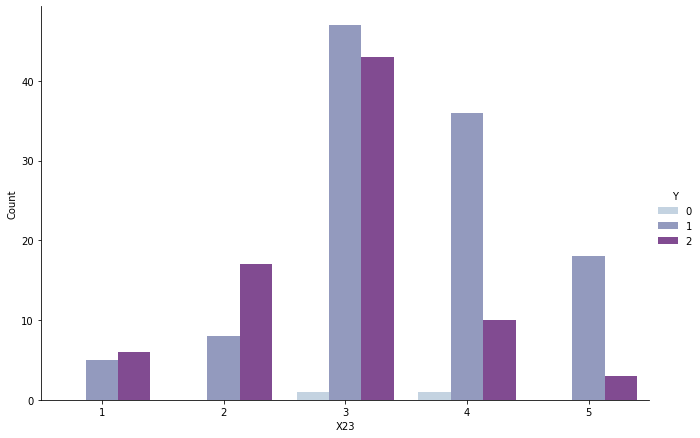

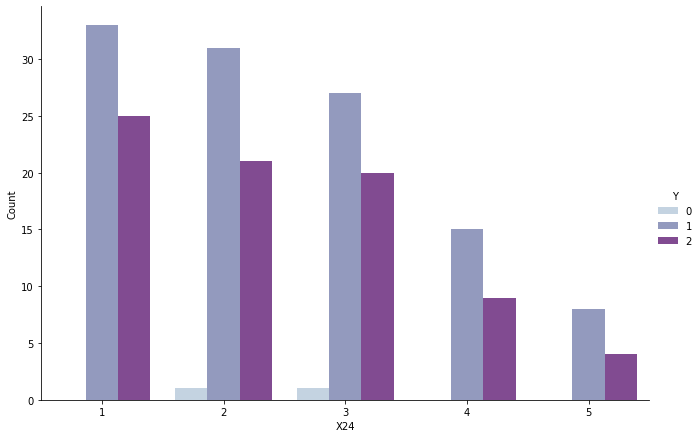

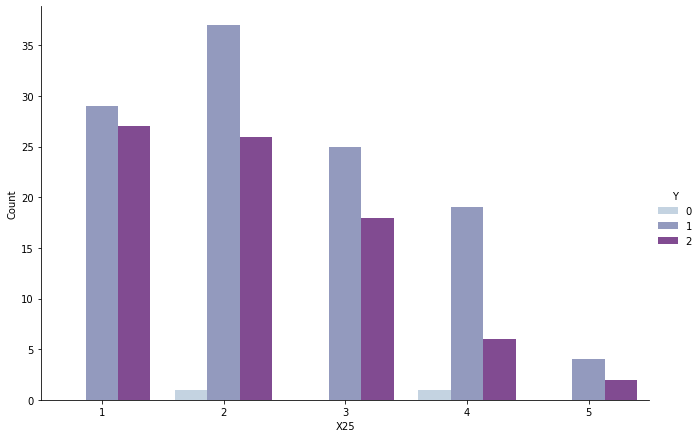

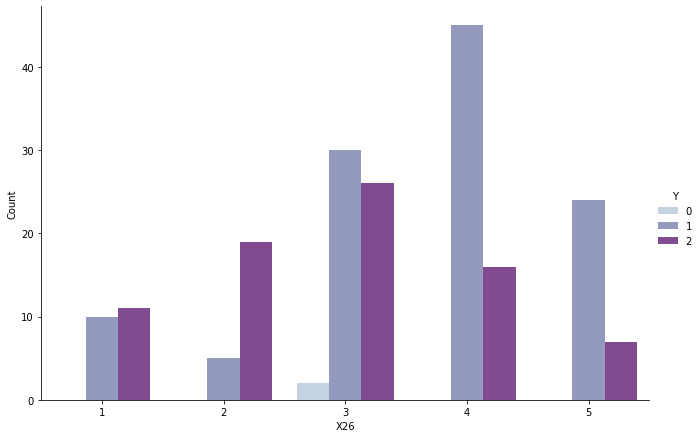

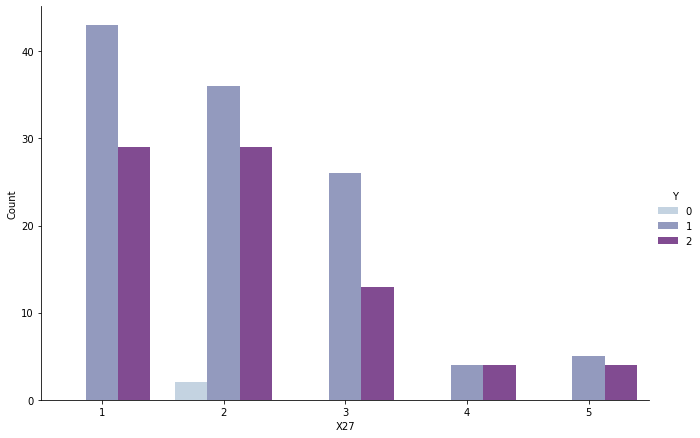

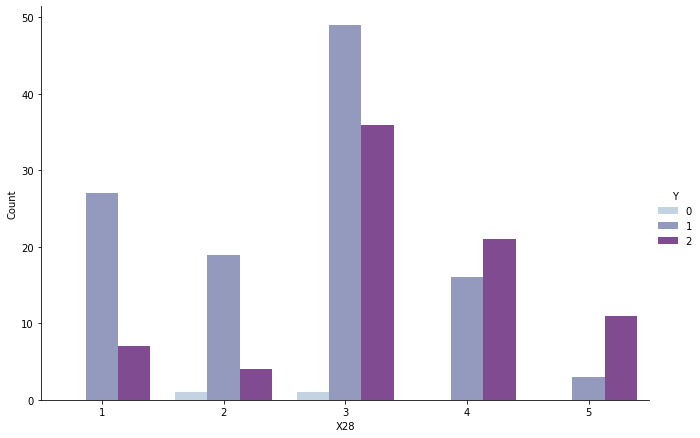

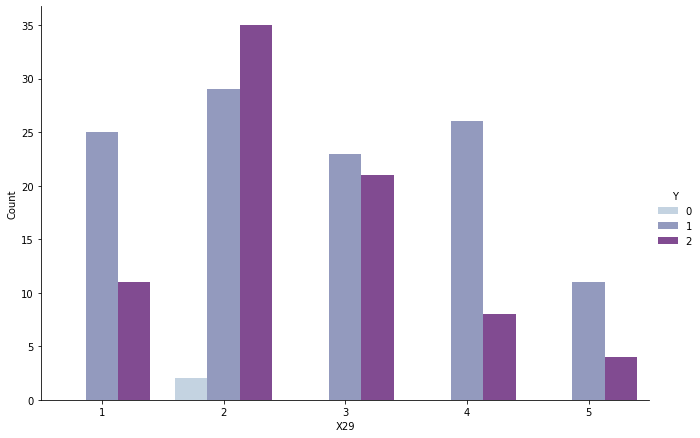

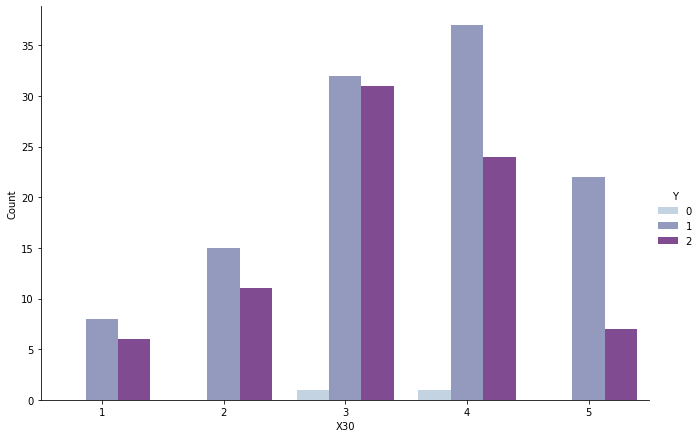

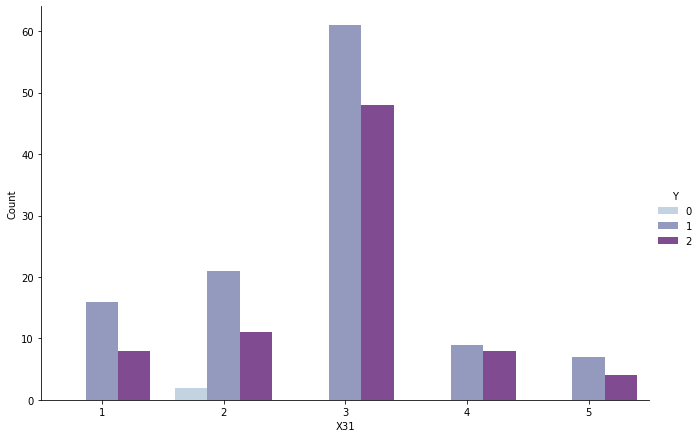

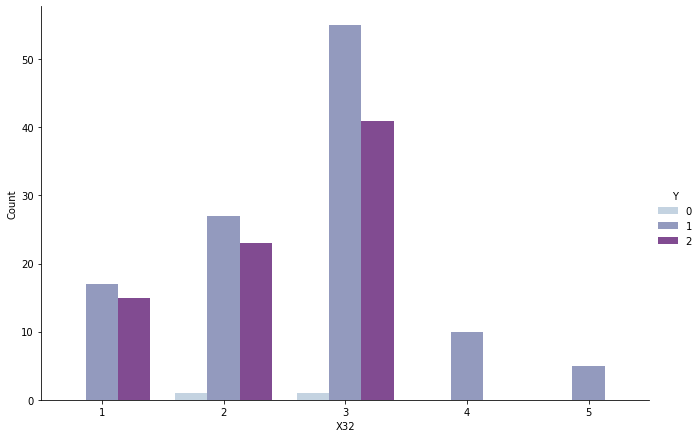

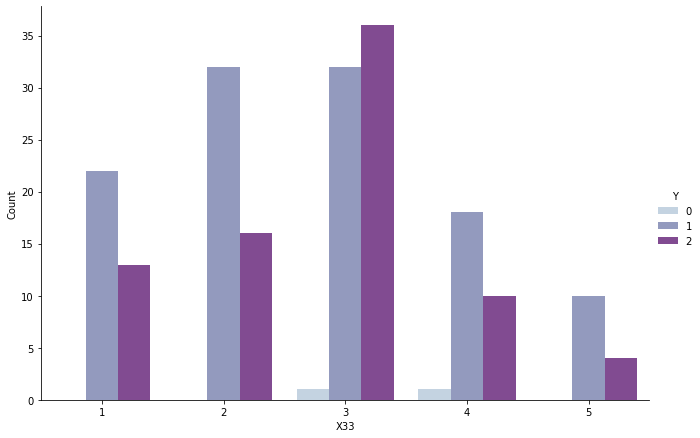

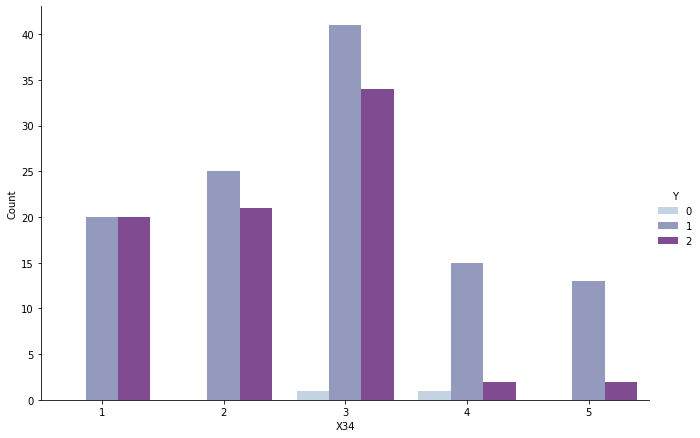

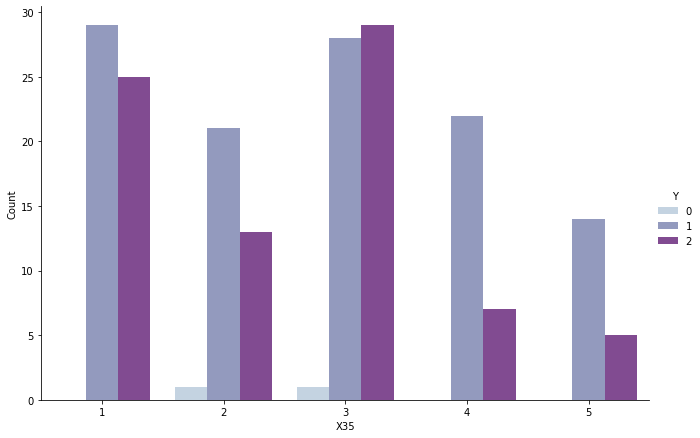

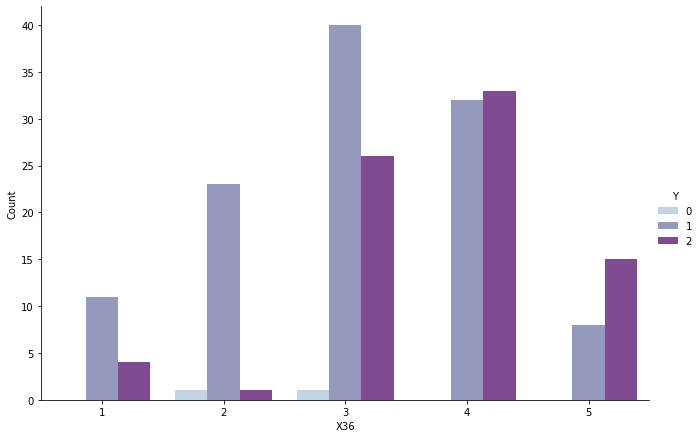

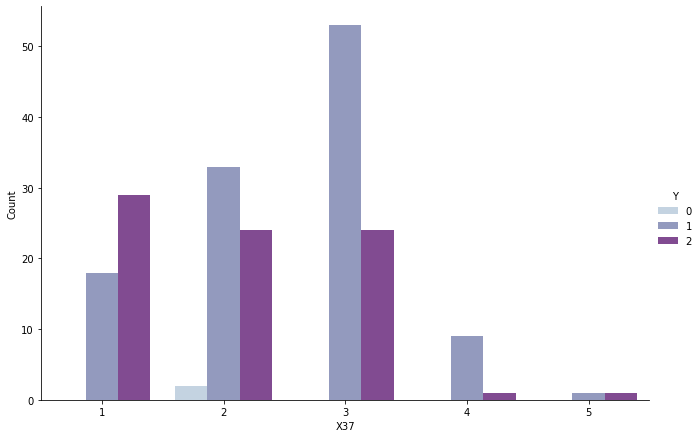

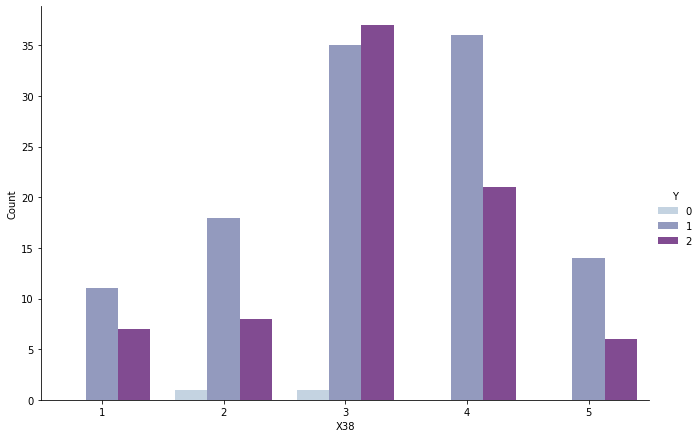

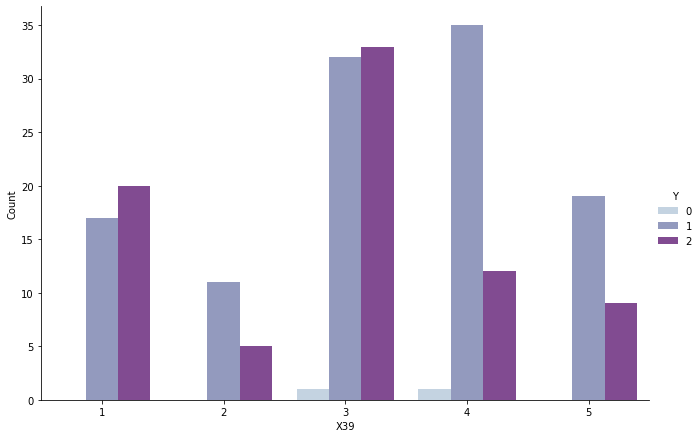

In [52]:
for col in df.columns:
 if col !="Y":
   p=sns.catplot(x=col, hue="Y", kind="count", data=df,palette="BuPu", height=6, aspect=1.5).set(xlabel=col, ylabel='Count')
   p.savefig(f"../figc/demo/detailed_demo/2/{col}.png")

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


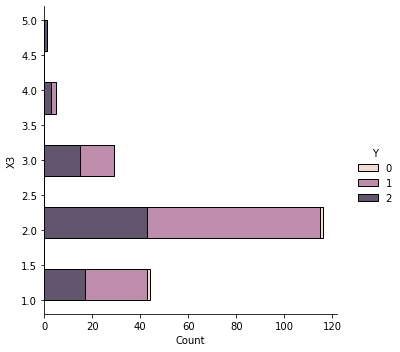

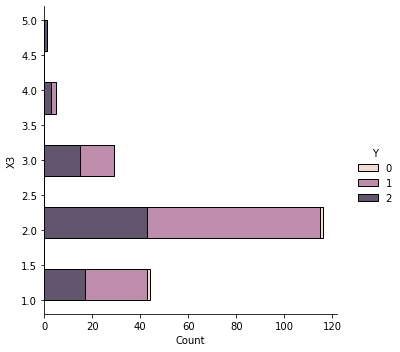

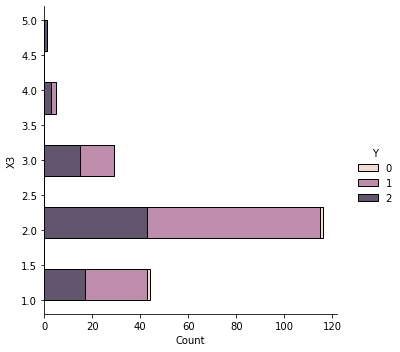

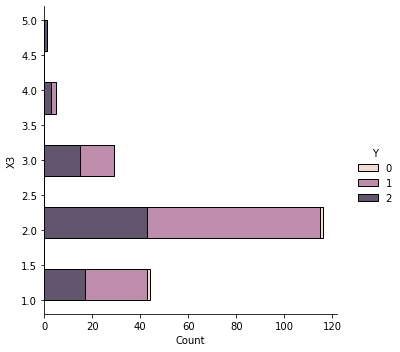

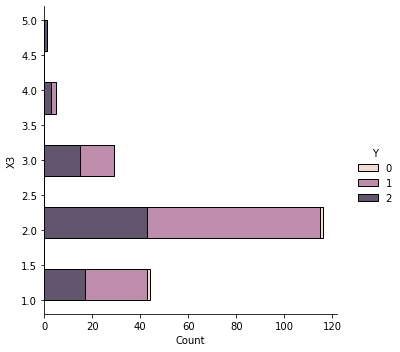

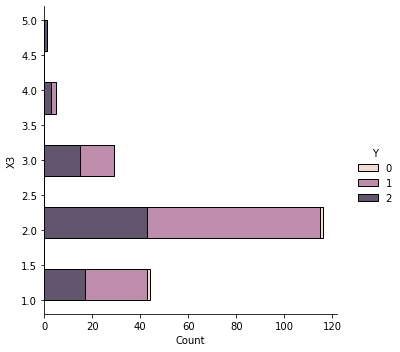

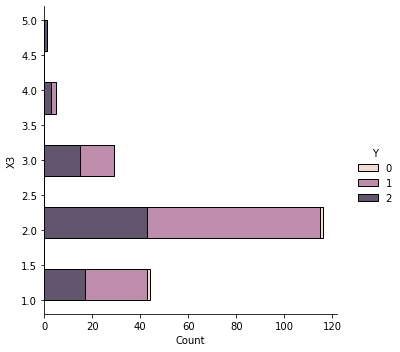

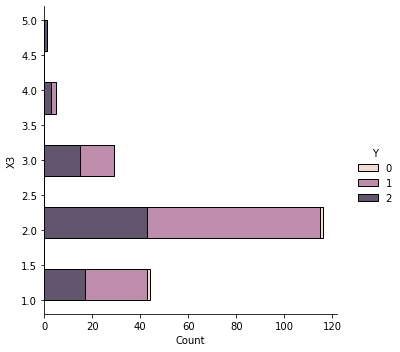

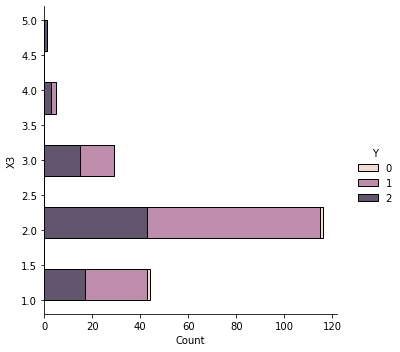

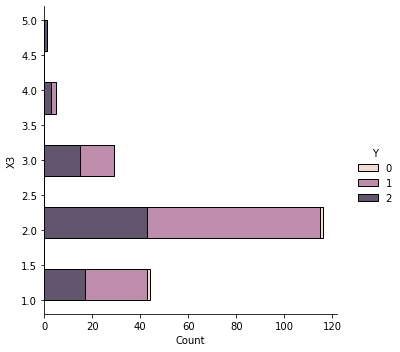

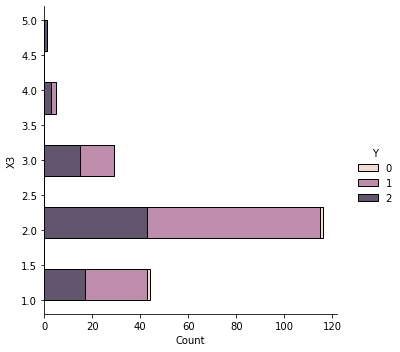

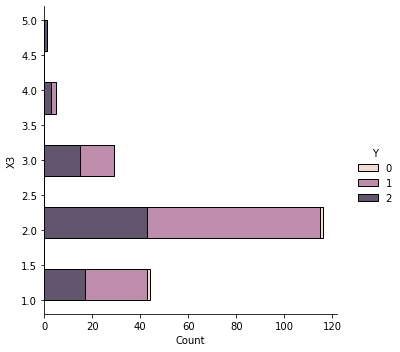

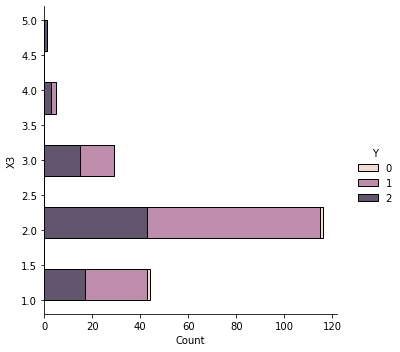

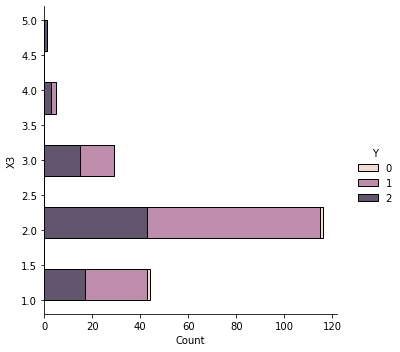

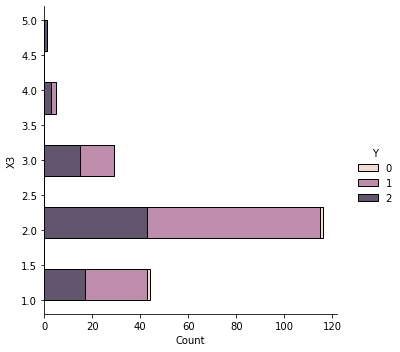

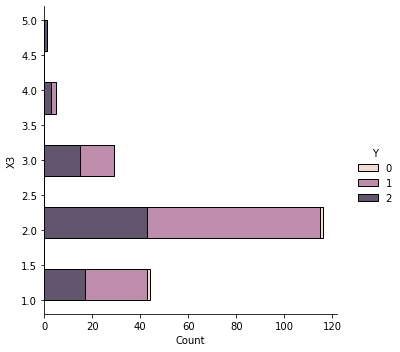

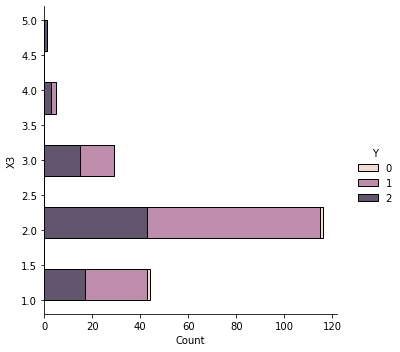

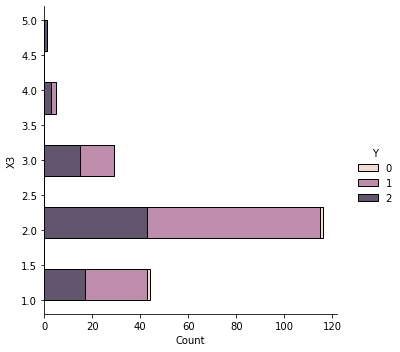

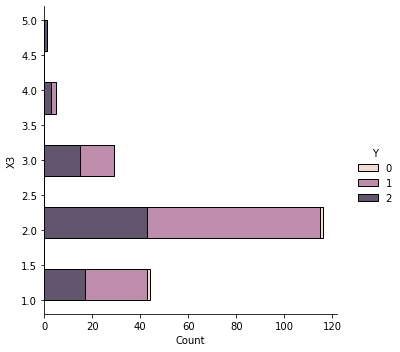

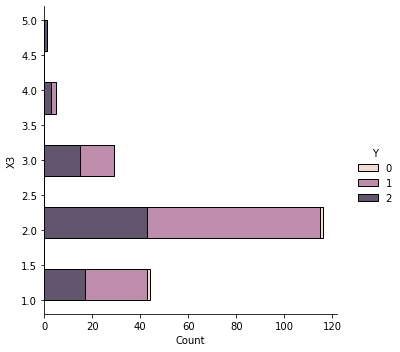

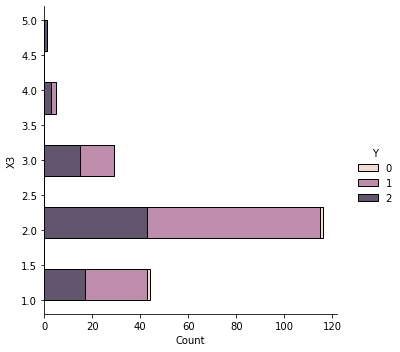

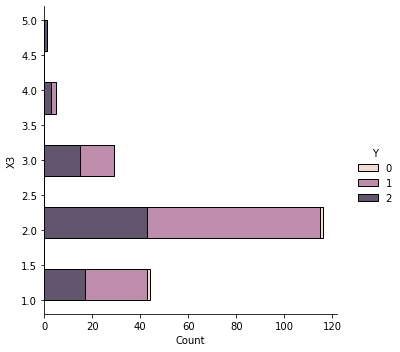

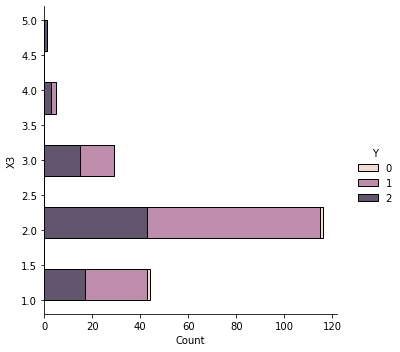

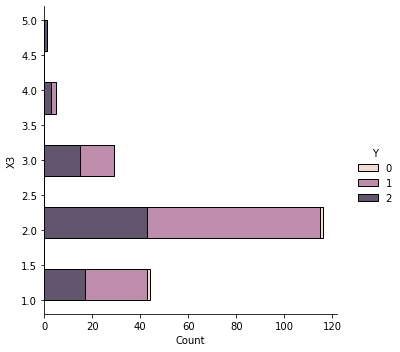

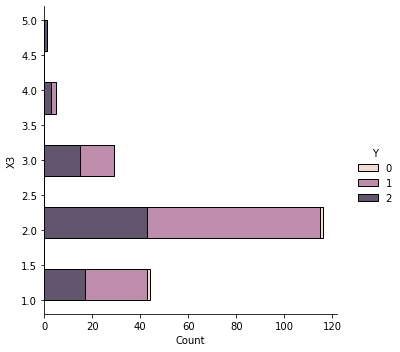

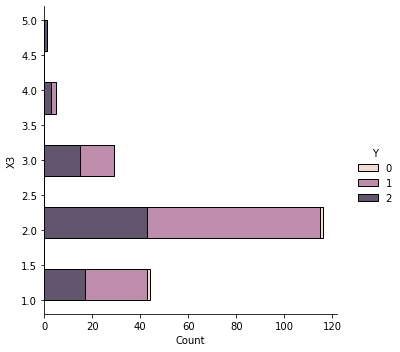

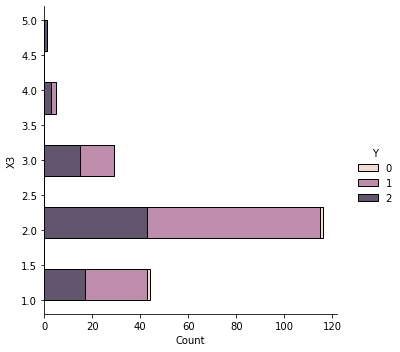

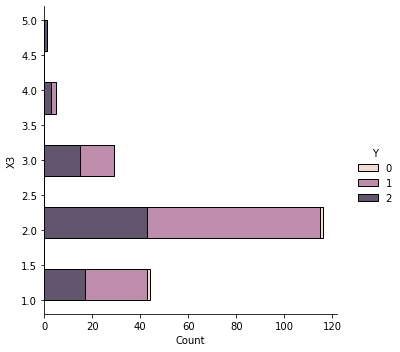

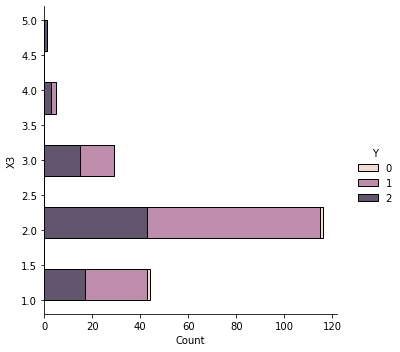

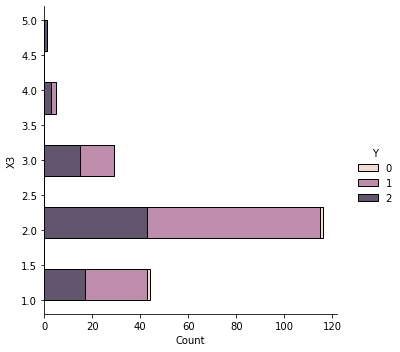

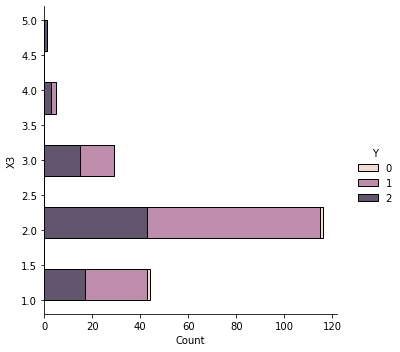

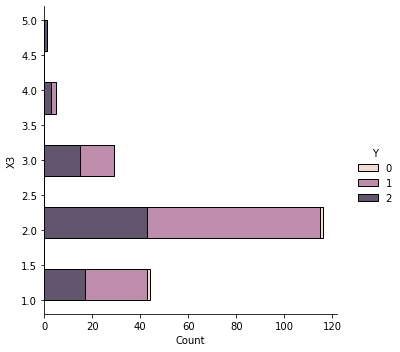

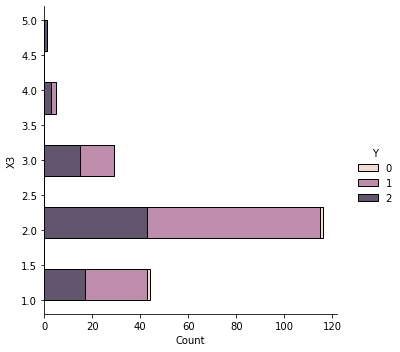

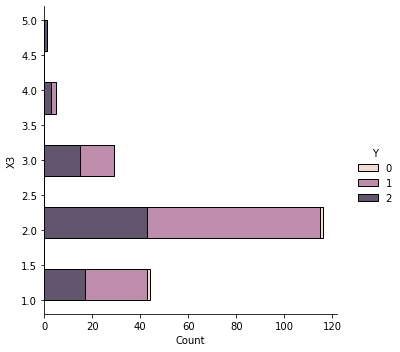

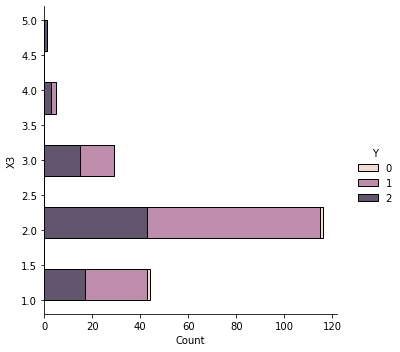

In [53]:
for col in df.columns:
 if col !="Y":
   p=sns.displot(df, y="X3", hue="Y", multiple="stack")
   p.savefig(f"../figc/demo/demostack/{col}.png")

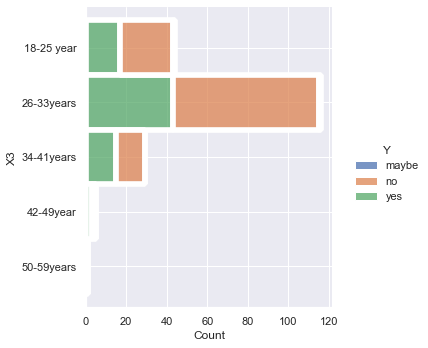

In [178]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.displot(df, y="X3", hue="Y", multiple="stack",)


In [187]:
from scipy import stats
for col in df.columns:
 if col !="Y":
   print(stats.pearsonr(df[col], df["Y"]))

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

#     ax.autoscale_view()
    ax.invert_yaxis()

hinton(C)